In [57]:
import pandas as pd

import sys  
sys.path.append('../')

import modules.data_wrangling.feature_selection as feature_selection
import modules.sentence_similarity.distances as distances

import modules.exploratory_data_analysis.base_rates as base_rates

from importlib import reload
distances = reload(distances)

# Load data

In [58]:
df = pd.read_csv("..\..\output\df_cleaned.csv", sep=";")
df.head()

,ID,URL,DATE,YEAR,HQ,AUT_COMM,JUDGE_ID,JUDGE_ML,PLAIN_ML,DEFEN_ML,...,LN_JNPREF_b,LN_JNPREF,CD_JOINT,CD_JO_CF,WIN_SL,WINWIN,CD_FH_AT,CD_FH_SP,CD_MP_AT,CD_MP_SP
0,APA_2018_3010,http://labje.unizar.es/sentencias/APA_2018_301...,43362,2018,Alicante,Comunidad Valenciana,0,1,1,0,...,0,0.0,0,0,0,0,0,0,1,0
1,APA_2019_1490,http://labje.unizar.es/sentencias/APA_2019_149...,43621,2019,Alicante,Comunidad Valenciana,1,1,1,0,...,0,0.0,0,0,0,0,0,0,0,0
2,APA_2019_1497,http://labje.unizar.es/sentencias/APA_2019_149...,43607,2019,Alicante,Comunidad Valenciana,1,1,1,0,...,0,0.0,0,0,0,0,1,0,1,0
3,APA_2019_1500,http://labje.unizar.es/sentencias/APA_2019_150...,43600,2019,Alicante,Comunidad Valenciana,2,0,1,0,...,0,0.0,0,0,0,0,0,0,1,0
4,APA_2019_15542,http://labje.unizar.es/sentencias/APA_2019_155...,43818,2019,Barcelona,Cataluña,3,1,1,0,...,0,0.0,0,0,0,0,0,0,0,0


# Compute distances

## Distance 1 (D1) - All

Euclidean distance considering all the arguments used by the court as well as all the request variables

### Get similarity cols

In [59]:
D1_cols = pd.read_csv("D1_cols.csv", sep=";")
cols_similarity = list(D1_cols["0"])
len(cols_similarity)

86

### Get similarity df

In [60]:
df_similarity_D1 = distances.similarity_df(df, cols_similarity)
df_similarity_D1.head()

,JUDGE_ML,PLAIN_ML,DEFEN_ML,RQ_JOINT,RQ_FH_AT,RQ_FH_SP,RQ_MP_AT,RQ_MP_SP,LP_BI_b,LP_BI,...,FT_RA_b,FT_RA,FT_RD_b,FT_RD,FT_PD_b,FT_PD,FT_AG_b,FT_AG,LN_JNPREF_b,LN_JNPREF
0,1,1,0,1,0,0,0,1,0.0,0.40,...,0.0,0.419355,1.0,0.53125,0.5,0.6,0.5,0.428571,0,0.0
1,1,1,0,1,0,0,0,0,0.5,0.44,...,1.0,0.548387,0.0,0.46875,0.5,0.6,0.5,0.428571,0,0.0
2,1,1,0,1,0,1,0,1,0.5,0.44,...,0.0,0.419355,0.0,0.46875,0.5,0.6,0.5,0.428571,0,0.0
3,0,1,0,1,0,0,0,1,0.0,0.32,...,0.5,0.451613,0.0,0.46875,0.5,0.6,0.5,0.428571,0,0.0
4,1,1,0,1,0,0,0,0,0.0,0.40,...,0.0,0.387097,0.5,0.50000,0.5,0.6,0.5,0.428571,0,0.0


### Get distances

In [61]:
df_D1 = distances.get_distances_df(df_similarity_D1)
df_D1.head()

Euclidean


,sentence_1,sentence_2,distance
0,0,1,1.877135
1,0,2,1.950515
2,0,3,1.709627
3,0,4,1.118936
4,0,5,2.076318


In [62]:
#df_distances_sorted = df_distances.sort_values(by = "distance", ascending = True)
#df_distances_sorted

### Distances plot

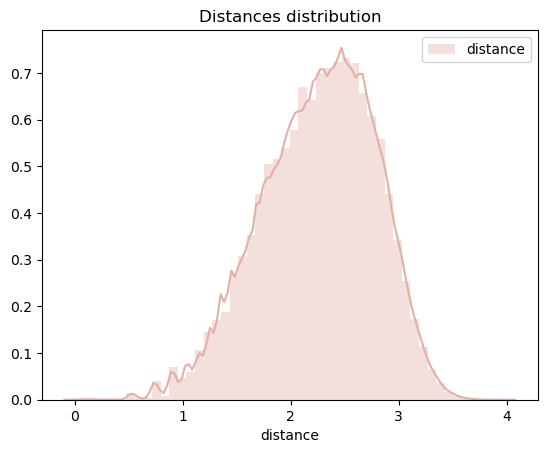

In [63]:
distances.distances_plot(df_D1)

### Save data

In [64]:
df_D1.to_csv("..\..\output\distances_D1.csv", sep=";")

## Distance 2 (D2) - Relevant

Euclidean distance but only with the variables that were more important for the probability of winning

### Get similarity cols

In [65]:
D2_cols = pd.read_csv("D2_cols.csv", sep=";")

relevant_features = list(D2_cols["features"])
relevant_weights = list(D2_cols["coefficients"])

print(len(relevant_features))
print(len(relevant_weights))

33
33


### Get similarity df

In [66]:
df_similarity_D2 = distances.similarity_df(df, relevant_features)
df_similarity_D2.head()

,JUDGE_ML,PLAIN_ML,RQ_JOINT,RQ_FH_AT,RQ_FH_SP,RQ_MP_AT,RQ_MP_SP,LP_BI_b,LP_BI,LP_PE_b,...,FT_RA_b,FT_RA,FT_RD_b,FT_RD,FT_PD_b,FT_PD,FT_AG_b,FT_AG,LN_JNPREF_b,LN_JNPREF
0,1,1,1,0,0,0,1,0.0,0.40,0.5,...,0.0,0.419355,1.0,0.53125,0.5,0.6,0.5,0.428571,0,0.0
1,1,1,1,0,0,0,0,0.5,0.44,0.5,...,1.0,0.548387,0.0,0.46875,0.5,0.6,0.5,0.428571,0,0.0
2,1,1,1,0,1,0,1,0.5,0.44,0.5,...,0.0,0.419355,0.0,0.46875,0.5,0.6,0.5,0.428571,0,0.0
3,0,1,1,0,0,0,1,0.0,0.32,0.5,...,0.5,0.451613,0.0,0.46875,0.5,0.6,0.5,0.428571,0,0.0
4,1,1,1,0,0,0,0,0.0,0.40,0.5,...,0.0,0.387097,0.5,0.50000,0.5,0.6,0.5,0.428571,0,0.0


### Get distances

In [67]:
df_D2 = distances.get_distances_df(df_similarity_D2, weights=relevant_weights)
df_D2.head()

Euclidean with weights


,sentence_1,sentence_2,distance
0,0,1,0.288644
1,0,2,0.320372
2,0,3,0.452307
3,0,4,0.235682
4,0,5,0.515626


### Distances plot

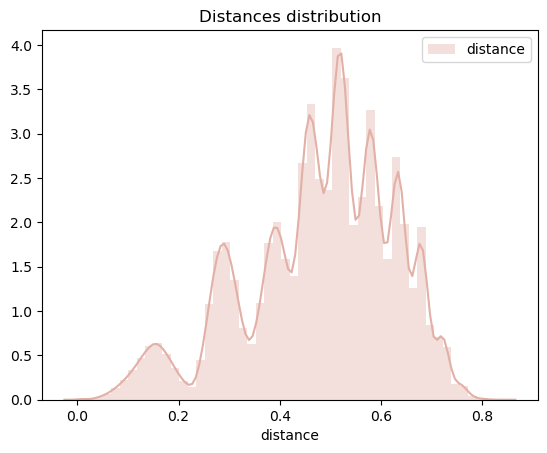

In [68]:
distances.distances_plot(df_D2)

### Save data

In [69]:
df_D2.to_csv("..\..\output\distances_D2.csv", sep=";")

## Distance 3 (D3) - Top

Weighted euclidean distance with the most important variables where the weights were proportional to the importance for the probability of winning

### Get similarity cols

In [70]:
D3_cols = pd.read_csv("D3_cols.csv", sep=";")

top_features = list(D3_cols["features"])
top_weights = list(D3_cols["coefficients"])

print(len(top_features))
print(len(top_weights))

10
10


### Get similarity df

In [71]:
df_similarity_D3 = distances.similarity_df(df, top_features)
df_similarity_D3.head()

,PLAIN_ML,RQ_JOINT,RQ_MP_SP,LP_BI_b,LP_BI,FT_CC_b,FT_CC,FT_RA_b,FT_RA,FT_RD
0,1,1,1,0.0,0.40,0.0,0.576923,0.0,0.419355,0.53125
1,1,1,0,0.5,0.44,0.5,0.615385,1.0,0.548387,0.46875
2,1,1,1,0.5,0.44,1.0,0.653846,0.0,0.419355,0.46875
3,1,1,1,0.0,0.32,0.5,0.615385,0.5,0.451613,0.46875
4,1,1,0,0.0,0.40,0.0,0.576923,0.0,0.387097,0.50000


### Get distances

In [72]:
df_D3 = distances.get_distances_df(df_similarity_D3, weights=top_weights)
df_D3.head()

Euclidean with weights


,sentence_1,sentence_2,distance
0,0,1,0.379279
1,0,2,0.273904
2,0,3,0.163576
3,0,4,0.258272
4,0,5,0.330268


### Distances plot

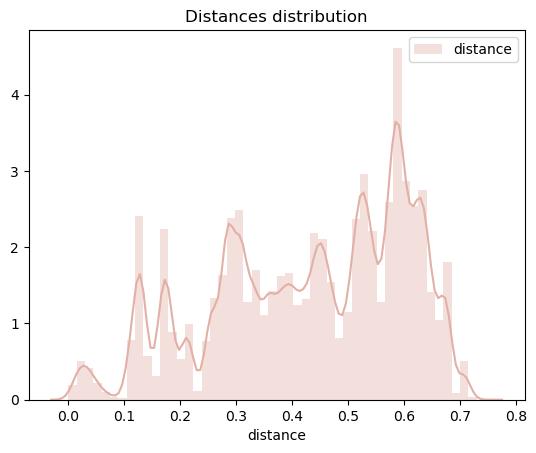

In [73]:
distances.distances_plot(df_D3)

### Save data

In [74]:
df_D3.to_csv("..\..\output\distances_D3.csv", sep=";")

# Visualize dividing by type of request

In [75]:
df_request_sole, df_request_joint = base_rates.df_by_group(df, "RQ_JOINT")

In [76]:
def compute_distances_D1(df):

    features_classification = feature_selection.features_classification_lists(file_name = r"..\..\data\features_classification.csv")
    cols_similarity = distances.similarity_cols(features_classification)

    df_similarity_D1 = distances.similarity_df(df, cols_similarity)

    df_D1 = distances.get_distances_df(df_similarity_D1)

    return df_D1

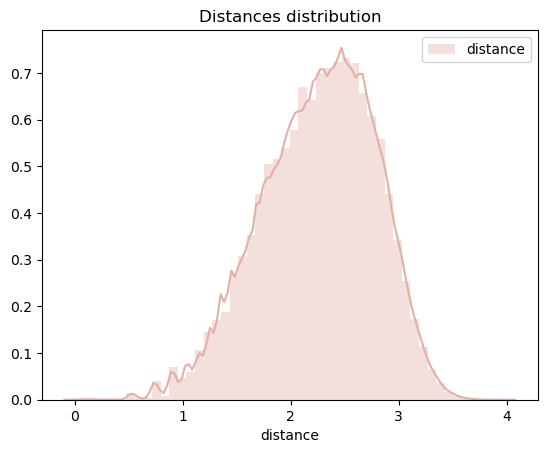

In [77]:
distances.distances_plot(df_D1)

Euclidean


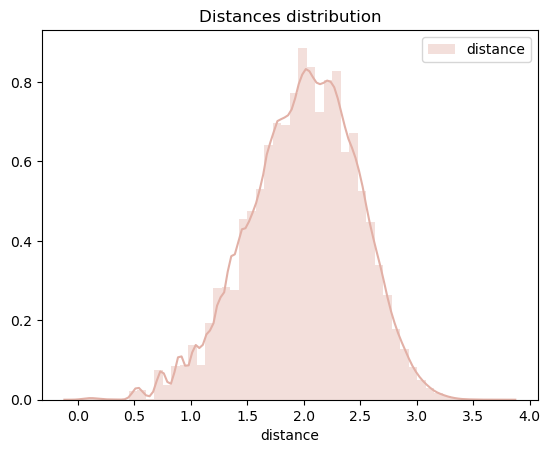

In [78]:
distances_sole = compute_distances_D1(df_request_sole)
distances.distances_plot(distances_sole)

Euclidean


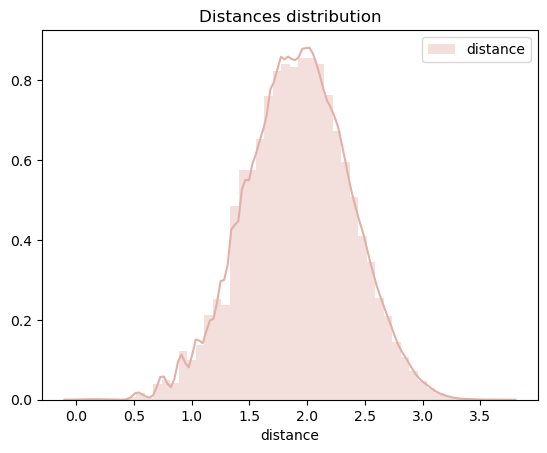

In [79]:
distances_joint = compute_distances_D1(df_request_joint)
distances.distances_plot(distances_joint)